In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('atenuação gama_ Cs-137.xlsx')

display(df)

display(df.shape)

display(df.dtypes)

,Medições,Espessura (cm),Contagem 1,Contagem 2,Contagem 3
0,I_0,0.0,49093,49842,49090
1,I_1,0.2,43478,43314,43259
2,I_2,0.4,38089,37876,37782
3,I_3,0.6,32836,32553,32686
4,I_4,0.8,28764,28700,28788
5,I_5,1.0,24927,25054,24926


(6, 5)

Medições           object
Espessura (cm)    float64
Contagem 1          int64
Contagem 2          int64
Contagem 3          int64
dtype: object

In [10]:
# Calcular a média das colunas de contagem para cada linha
df['Média'] = df[['Contagem 1', 'Contagem 2', 'Contagem 3']].mean(axis=1).round(3)

# Calcular o desvio padrão das contagens para cada linha
df['Desvio'] = df[['Contagem 1', 'Contagem 2', 'Contagem 3']].std(axis=1).round(3)

# Exibir o DataFrame resultante
display(df)

,Medições,Espessura (cm),Contagem 1,Contagem 2,Contagem 3,Média,Desvio
0,I_0,0.0,49093,49842,49090,49341.667,433.304
1,I_1,0.2,43478,43314,43259,43350.333,113.931
2,I_2,0.4,38089,37876,37782,37915.667,157.297
3,I_3,0.6,32836,32553,32686,32691.667,141.585
4,I_4,0.8,28764,28700,28788,28750.667,45.490
5,I_5,1.0,24927,25054,24926,24969.000,73.614


In [11]:
df_monolog = df[['Espessura (cm)','Média']]
display(df_monolog)

,Espessura (cm),Média
0,0.0,49341.667
1,0.2,43350.333
2,0.4,37915.667
3,0.6,32691.667
4,0.8,28750.667
5,1.0,24969.000


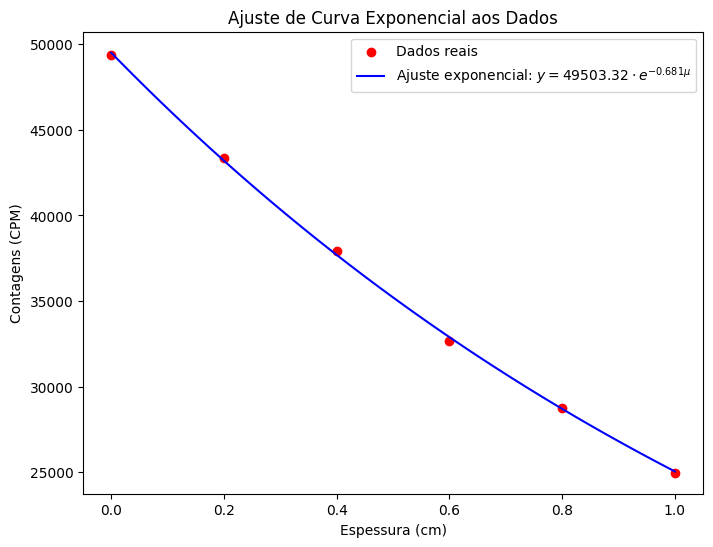

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados vindos do DataFrame
x = df_monolog['Espessura (cm)'].values
y = df_monolog['Média'].values

# Função modelo: Exponencial genérica
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Ajustar os parâmetros a e b
parametros, _ = curve_fit(modelo_exponencial, x, y, p0=(1, 0.1))
a, b = parametros

# Gerar valores ajustados para plotar a curva
x_fit = np.linspace(min(x), max(x), 100)
y_fit = modelo_exponencial(x_fit, a, b)

# Plotar os pontos reais
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais', color='red')

# Plotar a curva ajustada
plt.plot(x_fit, y_fit, label=fr'Ajuste exponencial: $y={a:.2f} \cdot e^{{{b:.3f}\mu}}$', color='blue')

# Personalizar gráfico
plt.title('Ajuste de Curva Exponencial aos Dados')
plt.xlabel('Espessura (cm)')
plt.ylabel('Contagens (CPM)')
plt.legend()
plt.show()



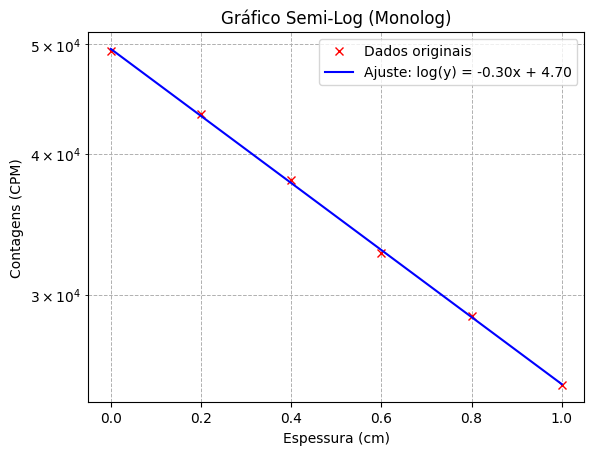

In [13]:
# Dados
x = df_monolog['Espessura (cm)'].values
y = df_monolog['Média'].values

# Filtra dados positivos (não pode log de zero ou negativo)
mask = y > 0
x = x[mask]
y = y[mask]

# Ajuste linear de log(y) versus x
log_y = np.log10(y)
coef = np.polyfit(x, log_y, 1)
m, b = coef

# Reta de ajuste (no espaço semi-log)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = 10**(m * x_fit + b)

# Plot
fig, ax = plt.subplots()

# Dados originais
ax.semilogy(x, y, 'x', label='Dados originais',color='red')

# Reta ajustada
ax.semilogy(x_fit, y_fit, '-', label=f'Ajuste: log(y) = {m:.2f}x + {b:.2f}',color='blue')

# Personalização
ax.set_xlabel('Espessura (cm)')
ax.set_ylabel('Contagens (CPM)')
ax.set_title('Gráfico Semi-Log (Monolog)')
ax.grid(True, which="both", linestyle='--', linewidth=0.7)
ax.legend()
plt.show()
